In [59]:
import pandas as pd
from mplsoccer import Pitch
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [60]:
data = pd.read_csv("Data/USD/usdShots.csv").reset_index()
data.dropna(inplace=True)

In [61]:
data.dropna(inplace=True)
startX = []
startY = []
endX = []
endY = []
for i in range(data.shape[0]):
    row = data.iloc[i]
    startX.append(float(row.get("Start Pos").split(", ")[0][1:]))
    startY.append(float(row.get("Start Pos").split(", ")[1][:-1]))
    endX.append(float(row.get("End Pos").split(", ")[0][1:]))
    endY.append(float(row.get("End Pos").split(", ")[1][:-1]))
data = data.assign(startX = startX)
data =data.assign(startY = startY)
data =data.assign(endX = endX)
data =data.assign(endY = endY)
oppSide = dict()
for i in data.get("numOpportunity").unique():
    df = data[data.get("numOpportunity")==i]
    endX = df.iloc[-1].get("endX")
    if endX >60:
        side = "right"
    elif endX<=60:
        side = "left"
    oppSide[i]=side
data = data.assign(Side = data.get("numOpportunity").apply(lambda num:oppSide[num]))
rightOpportunities = data[data.get("Side") == "right"]
rightOpportunities = rightOpportunities.assign(startX = 120-rightOpportunities.get("startX"))
rightOpportunities = rightOpportunities.assign(startY = 80-rightOpportunities.get("startY"))
rightOpportunities = rightOpportunities.assign(endX = 120-rightOpportunities.get("endX"))
rightOpportunities = rightOpportunities.assign(endY = 80-rightOpportunities.get("endY"))
leftOpportunities = data[data.get("Side") == "left"]
opportunities = pd.merge(rightOpportunities, leftOpportunities,how = "outer")
opportunities

,index,Game,numOpportunity,Event,Result,Start Pos,End Pos,Team,Player,startX,startY,endX,endY,Side
0,1,San Diego,0.0,Tackle,Successful,"[74.76190476190476, 48.19047619047619]","[58.19047619047618, 39.04761904761905]",USD,24.0,74.761905,48.190476,58.190476,39.047619,left
1,3,San Diego,0.0,Shot(foot),Unsuccessful,"[29.999999999999993, 29.904761904761912]","[13.428571428571416, 29.904761904761912]",USD,25.0,30.000000,29.904762,13.428571,29.904762,left
2,5,San Diego,1.0,Pass,Unsuccessful,"[25.428571428571416, 34.66666666666667]","[61.6190476190476, 19.80952380952381]",Opponent,4.0,25.428571,34.666667,61.619048,19.809524,left
3,7,San Diego,1.0,Pass,Successful,"[62.76190476190475, 19.61904761904762]","[43.33333333333332, 18.47619047619048]",USD,4.0,62.761905,19.619048,43.333333,18.476190,left
4,9,San Diego,1.0,Pass,Successful,"[42.38095238095237, 15.61904761904762]","[29.23809523809522, 27.61904761904762]",USD,7.0,42.380952,15.619048,29.238095,27.619048,left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,263,USD,35.0,Set Piece,Successful,"[119.52380952380952, 79.61904761904762]","[116.85714285714286, 31.61904761904762]",USD,24.0,0.476190,0.380952,3.142857,48.380952,right
135,265,USD,35.0,Shot(head),Unsuccessful,"[115.9047619047619, 30.66666666666667]","[118.76190476190476, 38.095238095238095]",USD,26.0,4.095238,49.333333,1.238095,41.904762,right
136,267,USD,36.0,Shot(foot),Successful,"[11.904761904761891, 40.19047619047619]","[0.4761904761904674, 42.666666666666664]",USD,3.0,11.904762,40.190476,0.476190,42.666667,left
137,269,USD,37.0,Set Piece,Successful,"[0.0952380952380878, 0.5714285714285694]","[6.761904761904752, 41.142857142857146]",USD,24.0,0.095238,0.571429,6.761905,41.142857,left


In [62]:
opportunityGoals = []
for i in range(int(opportunities.get("numOpportunity").max())+1):
    if i in [13,29,39,43,122,133]:
        continue
    limited = opportunities[opportunities.get("numOpportunity") == i].iloc[-1]
    if ("Shot" in limited.get("Event"))and (limited.get("Result") =="Successful"):
        opportunityGoals.append(i)
def addGoal(num):
    if num in opportunityGoals:
        return True
    else:
        return False
opportunities = opportunities.assign(resultGoal = opportunities.get("numOpportunity").apply(addGoal))

Text(0.5, 1.0, 'Heat Map of Opportunities Conceded With Buildup')

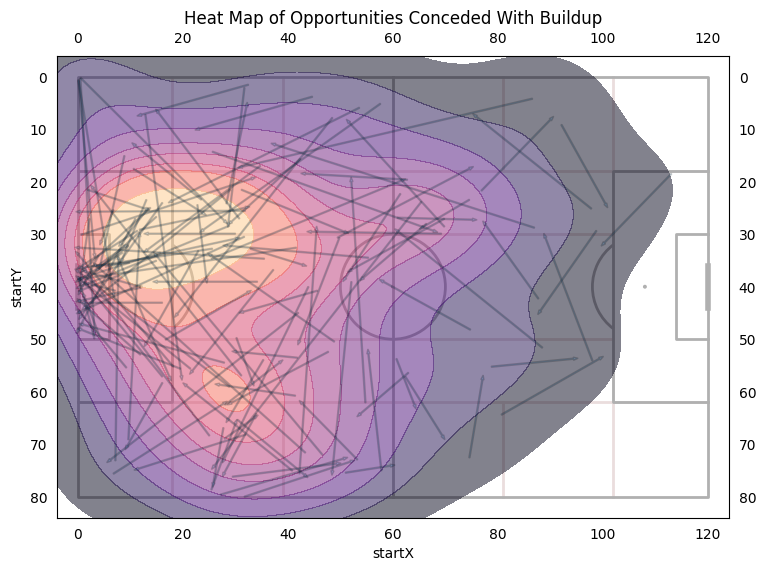

In [63]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=opportunities.get("startX"),y=opportunities.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")

for i in range(opportunities.shape[0]):
    row = opportunities.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .2)
plt.title("Heat Map of Opportunities Conceded With Buildup")

In [64]:
origins =[]
for i in range(int(opportunities.get("numOpportunity").max())+1):
    limited = opportunities[opportunities.get("numOpportunity") == i].iloc[0]
    origins.append(limited)
origins = pd.DataFrame(origins)

In [65]:
origins

,index,Game,numOpportunity,Event,Result,Start Pos,End Pos,Team,Player,startX,startY,endX,endY,Side,resultGoal
0,1,San Diego,0.0,Tackle,Successful,"[74.76190476190476, 48.19047619047619]","[58.19047619047618, 39.04761904761905]",USD,24.0,74.761905,48.190476,58.190476,39.047619,left,False
2,5,San Diego,1.0,Pass,Unsuccessful,"[25.428571428571416, 34.66666666666667]","[61.6190476190476, 19.80952380952381]",Opponent,4.0,25.428571,34.666667,61.619048,19.809524,left,False
8,17,San Diego,2.0,Tackle,Successful,"[41.61904761904761, 19.23809523809524]","[-1, -1]",USD,30.0,41.619048,19.238095,-1.000000,-1.000000,left,False
10,21,San Diego,3.0,Tackle,Successful,"[64.47619047619045, 45.714285714285715]","[-1, -1]",USD,4.0,55.523810,34.285714,121.000000,81.000000,right,True
13,27,San Diego,4.0,Pass,Unsuccessful,"[74.38095238095238, 39.23809523809524]","[88.47619047619045, 35.23809523809524]",Opponent,11.0,45.619048,40.761905,31.523810,44.761905,right,False
15,31,San Diego,5.0,Set Piece,Successful,"[119.52380952380952, 79.80952380952381]","[92.09523809523807, 52.57142857142857]",USD,24.0,0.476190,0.190476,27.904762,27.428571,right,False
17,35,San Diego,6.0,Throw-in,Successful,"[92.85714285714286, 0.3809523809523796]","[69.42857142857142, 7.238095238095241]",USD,24.0,27.142857,79.619048,50.571429,72.761905,right,False
21,42,USD,7.0,Tackle,Successful,"[62.95238095238094, 56.38095238095238]","[53.80952380952379, 64.19047619047619]",USD,25.0,62.952381,56.380952,53.809524,64.190476,left,False
26,52,USD,8.0,Pass,Unsuccessful,"[31.7142857142857, 2.095238095238102]","[28.66666666666665, 27.80952380952381]",Opponent,11.0,31.714286,2.095238,28.666667,27.809524,left,True
28,56,USD,9.0,Pass,Successful,"[113.04761904761904, 18.47619047619048]","[100.28571428571428, 31.61904761904762]",USD,33.0,113.047619,18.476190,100.285714,31.619048,left,False


Text(0.5, 1.0, 'USD Chance Origin')

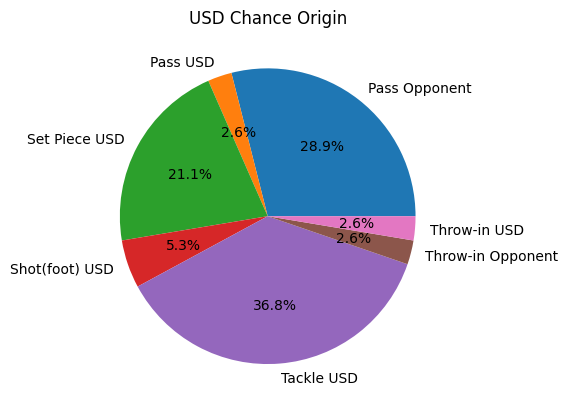

In [66]:
originCounts = origins.groupby(["Event","Team"]).count().reset_index()
labels = originCounts.get("Event") + " "+originCounts.get("Team")
plt.pie(originCounts.get("index"),labels = labels,autopct='%1.1f%%')
plt.title("USD Chance Origin")

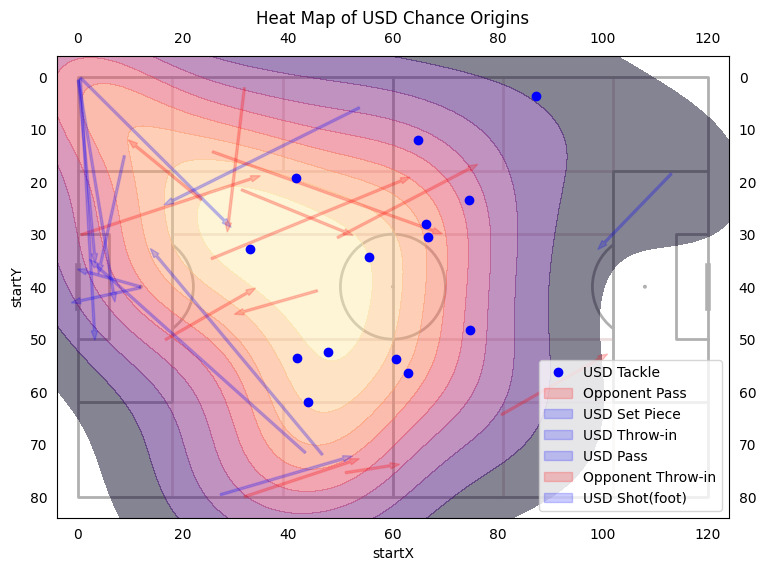

In [67]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=origins.get("startX"),y=origins.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")

for i in range(origins.shape[0]):
    row = origins.iloc[i]
    team = row.get("Team")
    if team == "USD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="1st Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "USD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .4,alpha = .2,color =color,label = team+ " "+row.get("Event"))
plt.title("Heat Map of USD Chance Origins")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())


38

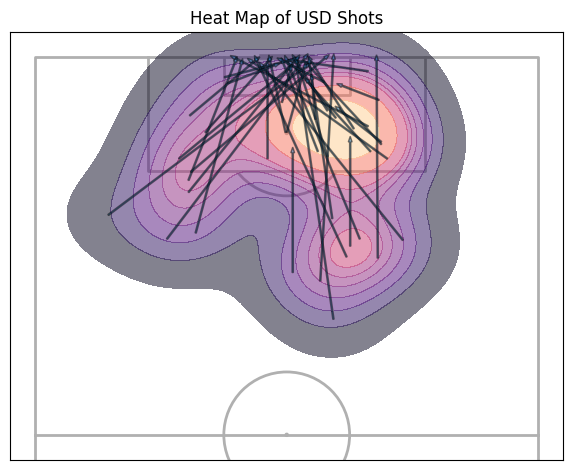

In [88]:
shots = opportunities[opportunities.get("Event").apply(lambda event: "Shot" in event)]
pitch = VerticalPitch(half=True, axis=True)
fig, ax = pitch.draw()
kde = sns.kdeplot(y=120-shots.get("startX"),x=80-shots.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")
for i in range(shots.shape[0]):
    row = shots.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(80-row.get("startY"),120-row.get("startX"),-1*(row.get("endY")-row.get("startY")),-1*(row.get("endX")-row.get("startX")),width = .2,alpha = .5)
plt.title("Heat Map of USD Shots")
shots.shape[0]

In [100]:
#shot assists
shotAssists = []
for i in range(1, opportunities.shape[0]):
    previous = opportunities.iloc[i-1]
    row = opportunities.iloc[i]
    if "Shot" in row.get("Event"):
        shotAssists.append([previous.get("numOpportunity"),previous.get("Game"),previous.get("Team"),previous.get("Event"),previous.get("Result"),previous.get("startX"),previous.get("startY"),previous.get("endX"),previous.get("endY"),row.get("Result"),previous.get("Player")])
shotAssists = pd.DataFrame(shotAssists,columns=["numOpportunity","Game","Team","Event","Event Result","startX","startY","endX",'endY',"Shot result","Player"])
shotAssists = shotAssists.iloc[:-3]
shotAssists

,numOpportunity,Game,Team,Event,Event Result,startX,startY,endX,endY,Shot result,Player
0,0.0,San Diego,USD,Tackle,Successful,74.761905,48.190476,58.190476,39.047619,Unsuccessful,24.0
1,1.0,San Diego,USD,Pass,Successful,12.857143,7.238095,19.714286,56.952381,Unsuccessful,11.0
2,2.0,San Diego,USD,Tackle,Successful,41.619048,19.238095,-1.000000,-1.000000,Unsuccessful,30.0
3,3.0,San Diego,USD,Pass,Successful,55.333333,34.476190,28.476190,32.190476,Successful,4.0
4,4.0,San Diego,Opponent,Pass,Unsuccessful,45.619048,40.761905,31.523810,44.761905,Unsuccessful,11.0
5,5.0,San Diego,USD,Set Piece,Successful,0.476190,0.190476,27.904762,27.428571,Unsuccessful,24.0
6,6.0,San Diego,USD,Pass,Successful,32.476190,1.523810,12.095238,7.238095,Unsuccessful,4.0
7,7.0,USD,Opponent,Tackle,Successful,11.714286,29.142857,31.904762,24.952381,Unsuccessful,11.0
8,8.0,USD,Opponent,Pass,Unsuccessful,31.714286,2.095238,28.666667,27.809524,Successful,11.0
9,9.0,USD,USD,Pass,Successful,57.619048,5.142857,23.904762,29.142857,Unsuccessful,5.0


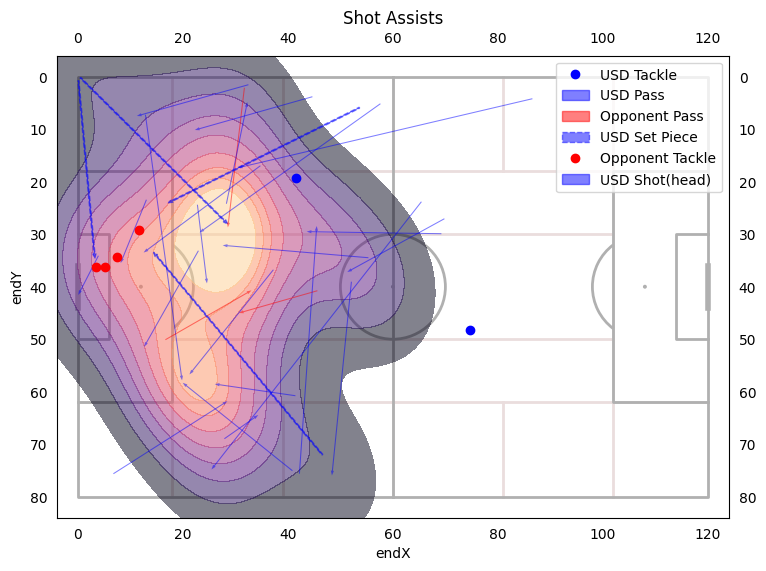

In [87]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=shotAssists.get("endX"),y=shotAssists.get("endY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")
for i in range(shotAssists.shape[0]):
    row = shotAssists.iloc[i]
    team = row.get("Team")
    if row.get("Event")=="Set Piece":
         linestyle = '--'
    else:
         linestyle = ''
    if team == "USD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="1st Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "USD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .5,color = color, label = team+" "+row.get("Event"),linestyle=linestyle)
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
plt.title("Shot Assists")
plt.show()

Text(0.5, 1.0, 'Shot Assists')

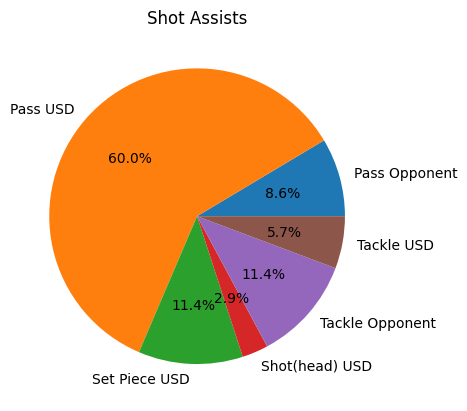

In [71]:
counts = shotAssists.groupby(["Event","Team"]).count().reset_index()
labels = counts.get("Event")+" "+counts.get("Team")
plt.pie(counts.get("Game"),labels=labels,autopct='%1.1f%%')
plt.title("Shot Assists")

In [72]:
boxShots = shots[(shots.get("startX")<=18)&(shots.get("startY")<62)&(shots.get("startY")>18)]
boxShots.shape[0]/shots.shape[0]

0.6052631578947368

13

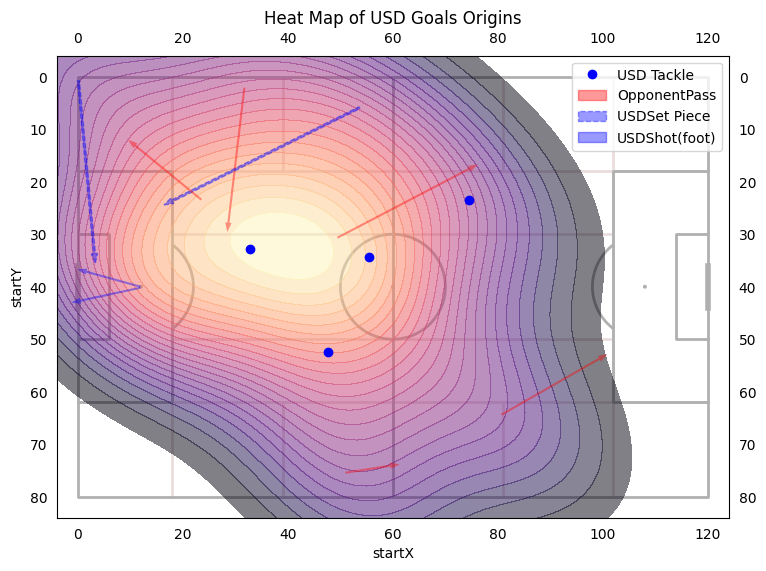

In [92]:
originsGoals = origins[origins.get("resultGoal")]
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=originsGoals.get("startX"),y=originsGoals.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 25,cmap = "magma")

for i in range(originsGoals.shape[0]):
    row = originsGoals.iloc[i]
    team = row.get("Team")
    if row.get("Event")=="Set Piece":
         linestyle = '--'
    else:
         linestyle = ''
    if team == "USD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle":
        if team == "USD":
            color = "ob"
        else:
            color = "ro"
        plt.plot(row.get("startX"),row.get("startY"),color,label = team+ " Tackle")
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .4,alpha = .4,color =color,label = team+ row.get("Event"),linestyle=linestyle)
plt.title("Heat Map of USD Goals Origins")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
originsGoals.shape[0]

0.7142857142857143


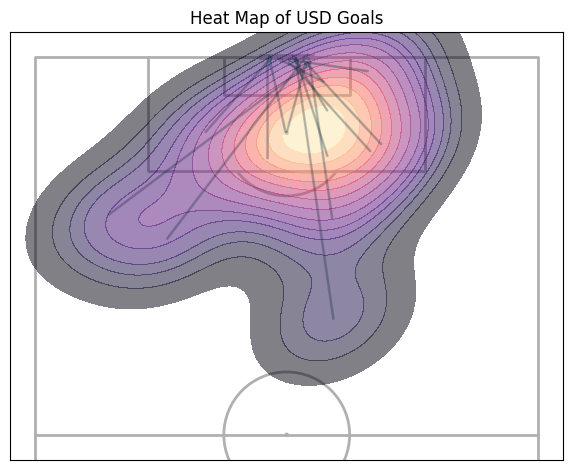

In [74]:
goals = opportunities[(opportunities.get("Event").apply(lambda event: "Shot" in event))& (opportunities.get("Result") == "Successful")]
boxGoals = goals[(goals.get("startX")<=18)&(goals.get("startY")<62)&(goals.get("startY")>18)]
pitch = VerticalPitch(half=True, axis=True)
fig, ax = pitch.draw()
kde = sns.kdeplot(y=120-goals.get("startX"),x=80-goals.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 15,cmap = "magma")
for i in range(goals.shape[0]):
    row = goals.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(80-row.get("startY"),120-row.get("startX"),-1*(row.get("endY")-row.get("startY")),-1*(row.get("endX")-row.get("startX")),width = .2,alpha = .2)
plt.title("Heat Map of USD Goals")
print(boxGoals.shape[0]/goals.shape[0])

In [75]:
print(boxGoals.shape[0]/boxShots.shape[0])
print((goals.shape[0]-boxGoals.shape[0])/(shots.shape[0]-boxShots.shape[0]))

0.43478260869565216
0.26666666666666666


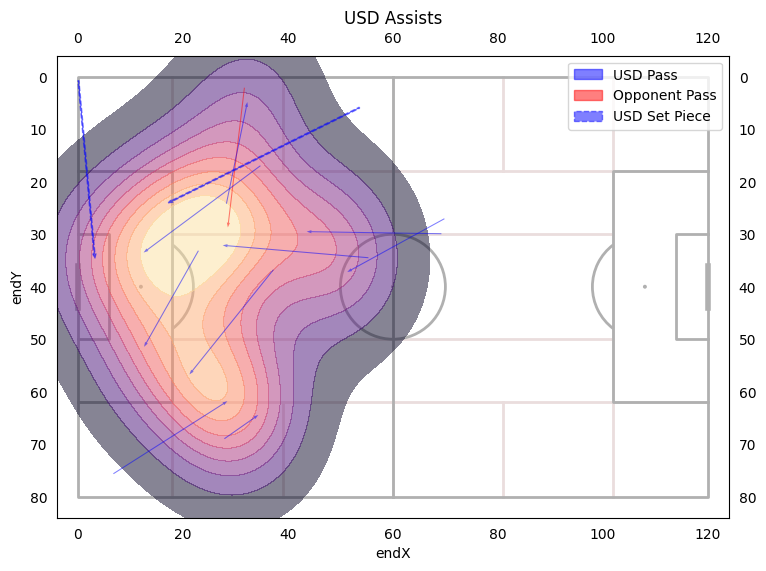

,numOpportunity,Game,Team,Event,Event Result,startX,startY,endX,endY,Shot result
3,3.0,San Diego,USD,Pass,Successful,55.333333,34.476190,28.476190,32.190476,Successful
8,8.0,USD,Opponent,Pass,Unsuccessful,31.714286,2.095238,28.666667,27.809524,Successful
10,10.0,USD,USD,Pass,Successful,37.238095,36.761905,21.809524,56.000000,Successful
11,11.0,USD,USD,Pass,Successful,6.761905,75.619048,27.714286,62.285714,Successful
13,13.0,USD,USD,Pass,Successful,69.238095,29.904762,44.476190,29.523810,Successful
14,14.0,USD,USD,Pass,Successful,34.761905,16.952381,13.238095,32.952381,Successful
17,17.0,USD,USD,Set Piece,Successful,53.619048,5.904762,18.000000,23.619048,Successful
18,18.0,USD,USD,Pass,Successful,22.952381,33.142857,13.047619,50.666667,Successful
21,21.0,USD,USD,Pass,Successful,27.904762,68.952381,33.619048,64.952381,Successful
22,22.0,USD,USD,Pass,Successful,69.809524,27.047619,52.095238,36.761905,Successful


In [86]:
assists = shotAssists[shotAssists.get("Shot result")=="Successful"].iloc[:-1]
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=assists.get("endX"),y=assists.get("endY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")
for i in range(assists.shape[0]):
    row = assists.iloc[i]
    team = row.get("Team")
    if row.get("Event")=="Set Piece":
         linestyle = '--'
    else:
         linestyle = ''
    if team == "USD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="1st Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "USD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .5,color = color, label = team+" "+row.get("Event"),linestyle = linestyle)
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
plt.title("USD Assists")
plt.show()
assists

In [79]:
playerTouches = opportunities.groupby("Player").count()
playerTouches = playerTouches.assign(Touches = playerTouches.get("index")).get(["Touches"]).sort_values("Touches",ascending=False)
playerTouches

,Touches
Player,
11.0,20
24.0,15
10.0,15
17.0,13
4.0,11
26.0,11
6.0,9
7.0,8
8.0,7


In [95]:
playerShots = shots.groupby("Player").count()
playerShots = playerShots.assign(Shots = playerShots.get("index")).get(["Shots"]).sort_values("Shots",ascending=False)
playerShots

,Shots
Player,
11.0,11
10.0,5
7.0,3
24.0,3
26.0,3
3.0,2
4.0,2
30.0,2
6.0,1


In [104]:
playerShotAssists = shotAssists.groupby("Player").count()
playerShotAssists = playerShotAssists.assign(ShotAssists = playerShotAssists.get("Game")).get(["ShotAssists"]).sort_values("ShotAssists",ascending=False)
playerShotAssists

,ShotAssists
Player,
11.0,5
5.0,4
4.0,3
8.0,3
10.0,3
24.0,3
26.0,3
6.0,2
7.0,2


In [109]:
goalOpportunities = opportunities[opportunities.get("resultGoal")]
playerGoalTouches = goalOpportunities.groupby("Player").count()
playerGoalTouches = playerGoalTouches.assign(GoalTouches = playerGoalTouches.get("index")).get(["GoalTouches"]).sort_values("GoalTouches",ascending=False)
playerGoalTouches

,GoalTouches
Player,
10.0,6
4.0,5
11.0,5
8.0,4
25.0,4
26.0,4
24.0,3
3.0,2
13.0,2


In [108]:
playerOrigins = origins.groupby("Player").count()
playerOrigins = playerOrigins.assign(Origins = playerOrigins.get("index")).get(["Origins"]).sort_values("Origins",ascending=False)
playerOrigins

,Origins
Player,
24.0,8
17.0,5
4.0,4
25.0,3
26.0,3
3.0,2
5.0,2
8.0,2
10.0,2
